In [1]:
#Importing the relevant libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Reading the dataset given n github by datatrained
df1=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df=df1
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [4]:
#Happiest country
df.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [5]:
#least happy country
df.tail(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
#Descriptive statistics
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
#info about dataset and its feature types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

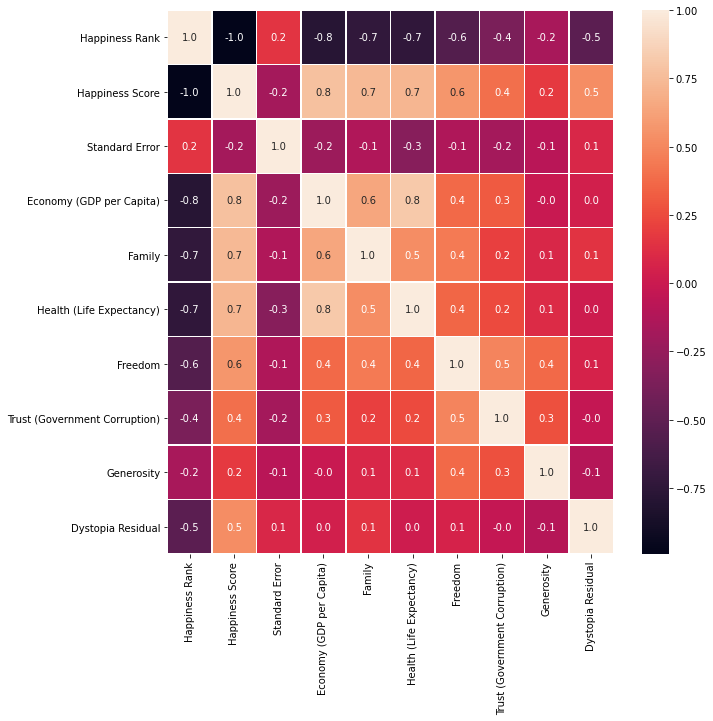

In [8]:
#cheching for strong correlations
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

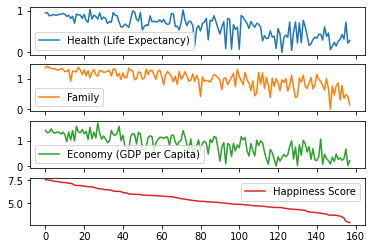

In [9]:
figure= df.loc[:,["Health (Life Expectancy)","Family", "Economy (GDP per Capita)","Happiness Score" ]]
figure.plot(subplots = True)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

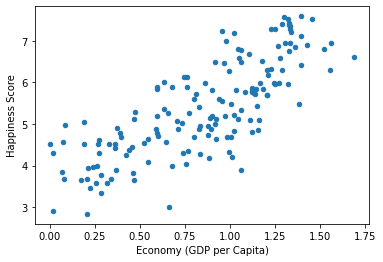

In [10]:
figure.plot(kind = "scatter", x = "Economy (GDP per Capita)", y = "Happiness Score")

Text(0.5, 1.0, 'Happiness Score Ratio by Regions')

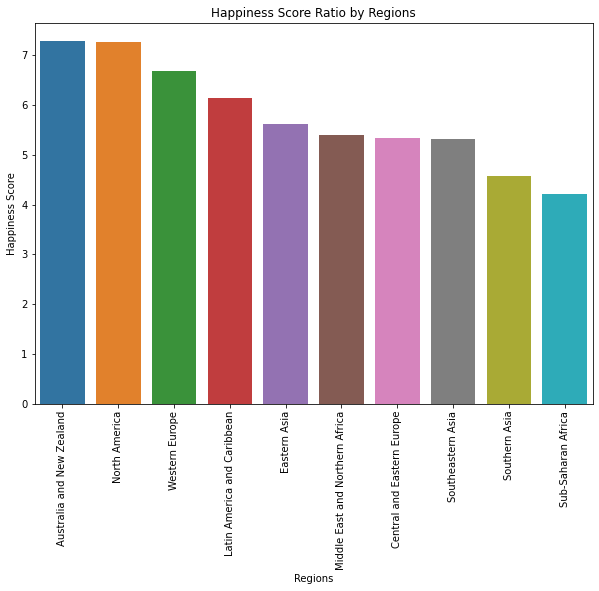

In [11]:
region_list = list(df.Region.unique())
region_happiness_score_ratio = []
for i in region_list:
    x = df[df.Region == i]
    region_happiness_score_rate = sum(x["Happiness Score"])/len(x)
    region_happiness_score_ratio.append(region_happiness_score_rate)
#I want to sort my new data 
data_bar = pd.DataFrame({'region_list':region_list, 'region_happiness_score_ratio':region_happiness_score_ratio})
new_index = (data_bar['region_happiness_score_ratio'].sort_values(ascending = False)).index.values
sorted_data = data_bar.reindex(new_index)

#visualisation
plt.figure(figsize=(10,7))
sns.barplot(x=sorted_data['region_list'], y=sorted_data['region_happiness_score_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Regions')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Ratio by Regions')


Text(0.5, 1.0, 'Economy Ratio by Regions')

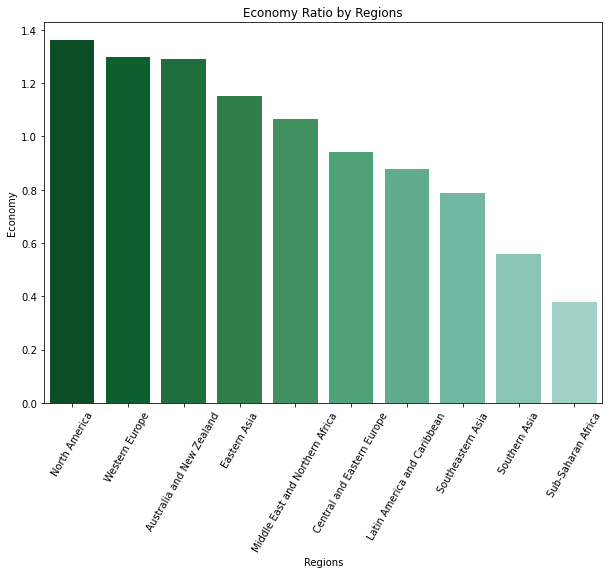

In [12]:
region_economy_ratio = []
for i in region_list:
    y = df[df.Region == i]
    region_economy_rate = sum(y['Economy (GDP per Capita)'])/len(y)
    region_economy_ratio.append(region_economy_rate)
    
data_bar2 = pd.DataFrame({'region_list':region_list,'region_economy_ratio':region_economy_ratio})
new_index2=(data_bar2['region_economy_ratio'].sort_values(ascending = False)).index.values
sorted_data2 = data_bar2.reindex(new_index2)

plt.figure(figsize=(10,7))
sns.barplot(x=sorted_data2['region_list'], y=sorted_data2['region_economy_ratio'], palette = sns.color_palette("BuGn_r",15) )
plt.xticks(rotation= 60)
plt.xlabel('Regions')
plt.ylabel('Economy')
plt.title('Economy Ratio by Regions')

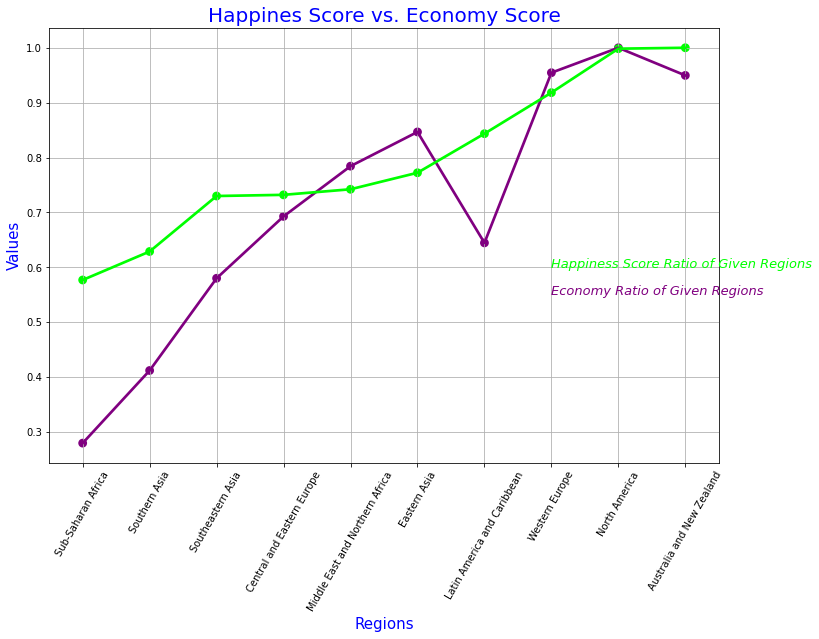

In [13]:
sorted_data.region_happiness_score_ratio = sorted_data.region_happiness_score_ratio/max(sorted_data.region_happiness_score_ratio)
sorted_data2.region_economy_ratio = sorted_data2.region_economy_ratio/max(sorted_data2.region_economy_ratio)
data = pd.concat([sorted_data,sorted_data2.region_economy_ratio],axis = 1)
data.sort_values("region_happiness_score_ratio",inplace = True)

#visualisation
f,ax1 = plt.subplots(figsize = (12,8))
sns.pointplot(x = "region_list",y = "region_economy_ratio",data = data,color = 'purple',alpha = 0.7)
sns.pointplot(x = "region_list",y = "region_happiness_score_ratio", data = data,color = 'lime',alpha = 0.7)
plt.text(7,0.6, "Happiness Score Ratio of Given Regions",color = 'lime',fontsize = 13,style = 'italic' )
plt.text(7,0.55, "Economy Ratio of Given Regions",color = 'purple',fontsize = 13,style = 'italic')
plt.xlabel('Regions', fontsize = 15, color = 'blue')
plt.ylabel('Values', fontsize = 15, color ='blue')
plt.xticks(rotation = 60)
plt.title('Happines Score vs. Economy Score', fontsize = 20, color = 'blue')
plt.grid()

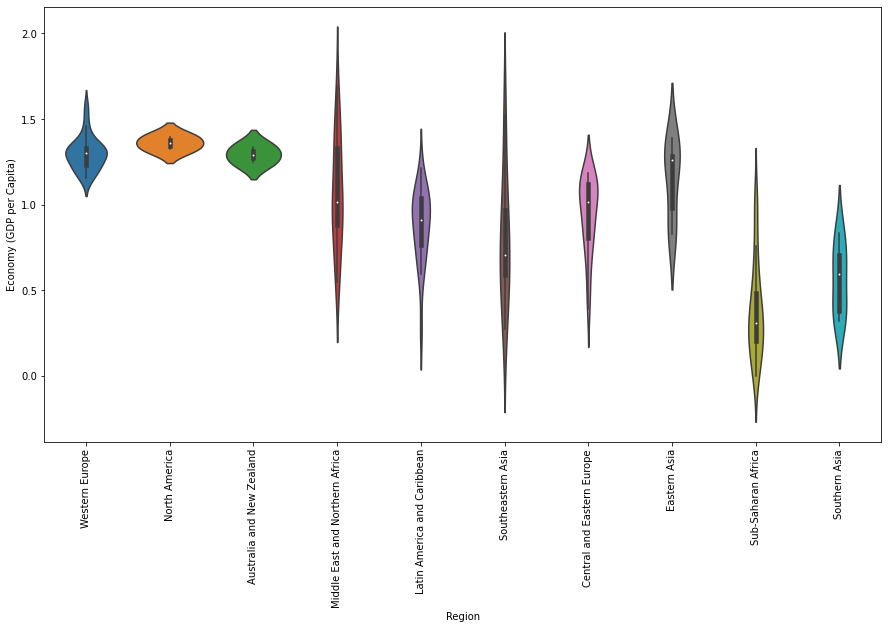

In [14]:
f,ax1 = plt.subplots(figsize = (15,8))
sns.violinplot(x = df.Region, y = df['Economy (GDP per Capita)'])
plt.xticks(rotation = 90)
plt.show()

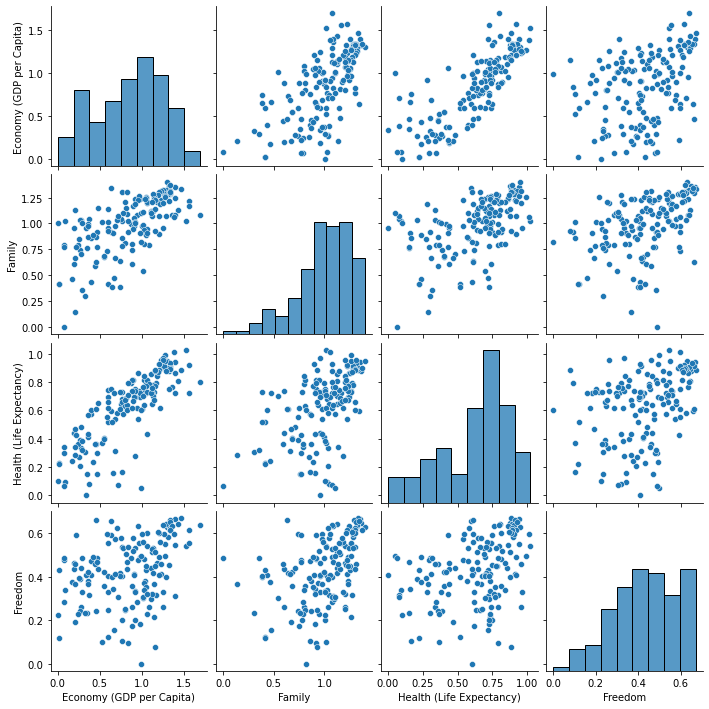

In [15]:
sns.pairplot(df.iloc[:,[0,5,6,7,8]])
plt.show()

In [16]:
df.skew(axis = 0, skipna = True)

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [17]:
one_hot = pd.get_dummies(df['Region'],drop_first=True,prefix="Region")
# Drop column Region as it is now encoded
df = df.drop(['Region',"Country"],axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [18]:
#Definig the dependant and independant variable on the train datset

X=df.drop(["Happiness Score"],axis=1)
Y=np.asarray(df["Happiness Score"])
Y=np.log1p(Y) # removing skewness

In [19]:
#Splitting the X and Y int test and train sest

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Train set: (126, 18) (126,)
Test set: (32, 18) (32,)


In [21]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(('Ridge', Ridge()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=21,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.988639 (0.004100)
LASSO: -0.105085 (0.082580)
EN: -0.105085 (0.082580)
KNN: 0.778187 (0.080428)
DTR: 0.994013 (0.003217)
GBM: 0.996801 (0.002425)
Ridge: 0.974871 (0.018453)


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import RepeatedKFold
model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
# define search
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, Y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.013389253827045791
Best Hyperparameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'solver': 'svd'}


In [23]:
prediction=search.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y_test, prediction))
print(mean_squared_error(Y_test, prediction))
print(math.sqrt(mean_squared_error(Y_test, prediction)))

0.01009405495430278
0.00015029523406473179
0.012259495669265184


In [25]:
#Taking the antilog of ouput because it was log transformed earlier
output = np.expm1(prediction) #antilog